In [2]:
# read the given dataset
import pandas as pd

# Read the dataset
df = pd.read_csv('/content/Information for Accommodation.csv')

# Print the first few rows of the dataset
df.head(10)


,Type,Name,Address,Rooms,Grade,District,AGA Division,PS/MC/UC,Logitiute,Latitude
0,Boutique Hotels,THE THEVA RESIDENCY,"11/B5/10-1 06TH LANE, HANTANA,KANDY",10,NaN,Kandy,Kandy Divisional Secretariat,Kandy,80.635411,7.276036
1,Boutique Hotels,HIGHLAND VILLA,"351, ABIMANGAMA ROAD, KUMBALGAMA, WELIGAMA",10,NaN,Matara,Weligama Divisional Secretariat,Weligama Pradeshiya Sabha,80.409972,5.960334
2,Boutique Hotels,ULAGALLA WALAWWA RESORT,"THIRAPPANE, ANURADHAPURA",21,NaN,Anuradhapura,Anuradhapura East,Anuradhapura,80.545063,8.205927
3,Boutique Hotels,GALLE FORT HOTEL,"NO.28, CHURCH STREET, FORT , GALLE",14,NaN,Galle,Galle Divisional Secretariat,Galle,80.217563,6.026649
4,Boutique Hotels,THE ELEPHANT CORRIDOR,"POTHANA,KIBISSA, SIGIRIYA",21,NaN,Matale,NaN,Matale,80.710743,7.943525
5,Boutique Hotels,AMANWELLA,"WELLAWATURA, GODELLAWELA, TANGALLE",30,NaN,Hambantota,Tangalle Divisional Secretariat,Tangalle Pradeshiya Sabha,80.777376,6.006174
6,Boutique Hotels,ADITYA,"719/1, GALLE ROAD, DEVENIGODA,RATHGAMA",12,NaN,Galle,Galle Divisional Secretariat,Galle,80.134978,6.094732
7,Boutique Hotels,BUCKINGAM PLACE,"REKAWA VILLAGE, NETOLPITIYA, TANGALLE",11,NaN,Hambantota,Tangalle Divisional Secretariat,Tangalle Pradeshiya Sabha,80.855462,6.047336
8,Boutique Hotels,CLUB VILLA,"NO.138/15, GALLE ROAD, BENTOTA",15,NaN,Galle,Benthota Divisional Secretariat,Bentota Pradeshiya Sabha,79.999034,6.414093
9,Boutique Hotels,SAMAN VILLAS,"ATURUWELLA, INDURUWA",27,NaN,Galle,Galle Divisional Secretariat,Galle,80.004447,6.395518


In [4]:
#check the data types of each columns
df.dtypes

Type             object
Name             object
Address          object
Rooms             int64
Grade            object
District         object
AGA Division     object
PS/MC/UC         object
Logitiute       float64
Latitude        float64
dtype: object

In [5]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['Rooms', 'Logitiute', 'Latitude'], dtype='object')
Index(['Type', 'Name', 'Address', 'Grade', 'District', 'AGA Division',
       'PS/MC/UC'],
      dtype='object')


In [6]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          2130 non-null   object
 1   Name          2130 non-null   object
 2   Address       2130 non-null   object
 3   Grade         1837 non-null   object
 4   District      2130 non-null   object
 5   AGA Division  2111 non-null   object
 6   PS/MC/UC      2127 non-null   object
dtypes: object(7)
memory usage: 116.6+ KB


In [7]:
num_missing = df.isna().sum()
num_missing


Type              0
Name              0
Address           0
Rooms             0
Grade           293
District          0
AGA Division     19
PS/MC/UC          3
Logitiute       762
Latitude        760
dtype: int64

In [8]:
missing_values = df.isnull().sum().div(df.shape[0]) * 100
for column, missing in missing_values.items():
    print(f"Column: {column}, Missing Values: {missing:.2f}%")


Column: Type, Missing Values: 0.00%
Column: Name, Missing Values: 0.00%
Column: Address, Missing Values: 0.00%
Column: Rooms, Missing Values: 0.00%
Column: Grade, Missing Values: 13.76%
Column: District, Missing Values: 0.00%
Column: AGA Division, Missing Values: 0.89%
Column: PS/MC/UC, Missing Values: 0.14%
Column: Logitiute, Missing Values: 35.77%
Column: Latitude, Missing Values: 35.68%


**Missing value analysis**

<Axes: >

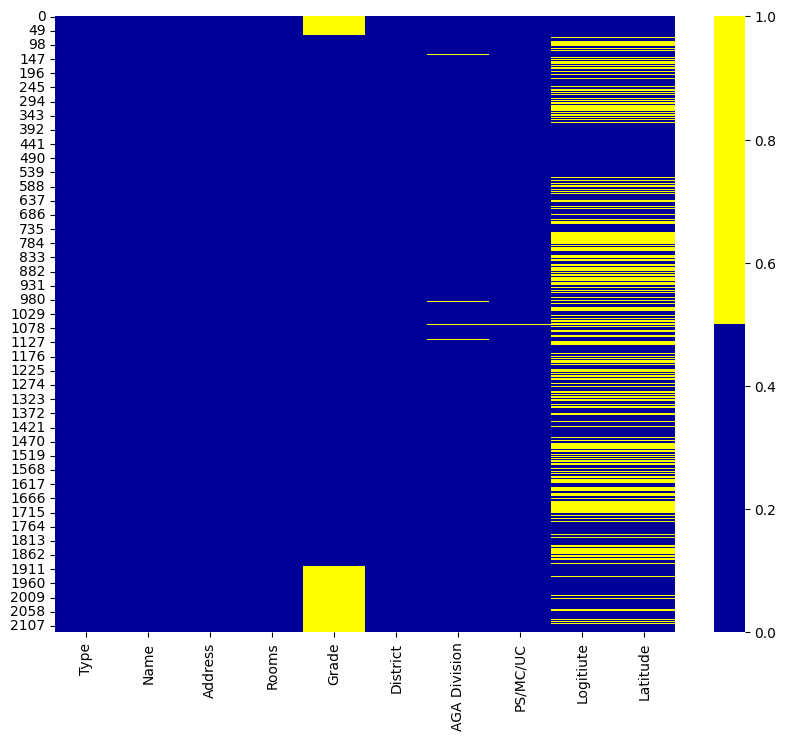

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = df.columns
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

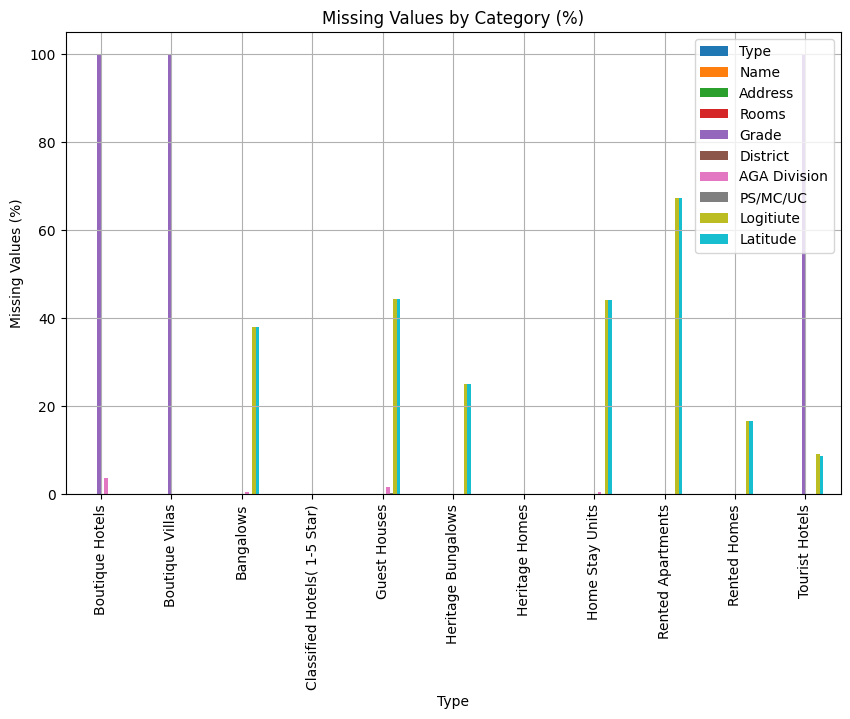

In [11]:
# obtain the distinct category of Type column wise missing values of columns as percentage with respect to category totals in Type column
missing_percentages = {}
for category in df['Type'].unique():
  category_df = df[df['Type'] == category]
  missing_counts = category_df.isna().sum()
  missing_percentages[category] = (missing_counts / category_df.shape[0]) * 100

missing_percentages_df = pd.DataFrame.from_dict(missing_percentages, orient='index')
missing_percentages_df.columns = df.columns
missing_percentages_df.index.name = 'Type'

# Create a stacked bar chart
ax = missing_percentages_df.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add labels and title
ax.set_xlabel('Type')
ax.set_ylabel('Missing Values (%)')
ax.set_title('Missing Values by Category (%)')

# Add grid and legend
ax.grid(True)
ax.legend(loc='upper right')

# Show the plot
plt.show()


100% missing in Grades for Boutique Hotels, Boutique Villas, Tourist Hotels
Grade, AGA Division, PS/MC/UC, Longitude and Latitude have missing values.  
Since District column doesn’t contain any missing values and we can get location information from District column rather than analyzing the data into AGA Divisional wise or PS/MC/UC wise. Also, Longitude and Latitude gives the exact location, and it contains more than 30% missing values data, we can ignore those two columns since we can get the location information from district level.
Deeper analyzing the missing values under Grade column, it was identified that the Boutique Hotels, Boutique Villas, Tourist Hotels has no Grading values appears in the dataset. Hence it was decided to impute the Grading value as “Not_Graded”.         


In [12]:
df['Grade'].fillna('Not_Graded', inplace=True)


In [13]:
missing_values = df.isnull().sum().div(df.shape[0]) * 100
for column, missing in missing_values.items():
    print(f"Column: {column}, Missing Values: {missing:.2f}%")


Column: Type, Missing Values: 0.00%
Column: Name, Missing Values: 0.00%
Column: Address, Missing Values: 0.00%
Column: Rooms, Missing Values: 0.00%
Column: Grade, Missing Values: 0.00%
Column: District, Missing Values: 0.00%
Column: AGA Division, Missing Values: 0.89%
Column: PS/MC/UC, Missing Values: 0.14%
Column: Logitiute, Missing Values: 35.77%
Column: Latitude, Missing Values: 35.68%


In [14]:
#Univariate Analysis
grouped_data = df.groupby('Type')['Type'].count()
print(grouped_data)

total_records = df.shape[0]
percentage_data = (grouped_data / total_records) * 100
for category, percentage in percentage_data.items():
    print(f"Accomodation Type: {category}, Percentage: {percentage:.2f}%")

Type
Bangalows                       348
Boutique Hotels                  28
Boutique Villas                  36
Classified Hotels( 1-5 Star)    141
Guest Houses                    894
Heritage Bungalows                4
Heritage Homes                    2
Home Stay Units                 378
Rented Apartments                64
Rented Homes                      6
Tourist Hotels                  229
Name: Type, dtype: int64
Accomodation Type: Bangalows, Percentage: 16.34%
Accomodation Type: Boutique Hotels, Percentage: 1.31%
Accomodation Type: Boutique Villas, Percentage: 1.69%
Accomodation Type: Classified Hotels( 1-5 Star), Percentage: 6.62%
Accomodation Type: Guest Houses, Percentage: 41.97%
Accomodation Type: Heritage Bungalows, Percentage: 0.19%
Accomodation Type: Heritage Homes, Percentage: 0.09%
Accomodation Type: Home Stay Units, Percentage: 17.75%
Accomodation Type: Rented Apartments, Percentage: 3.00%
Accomodation Type: Rented Homes, Percentage: 0.28%
Accomodation Type: Tourist

Type
Bangalows                       348
Boutique Hotels                  28
Boutique Villas                  36
Classified Hotels( 1-5 Star)    141
Guest Houses                    894
Heritage Bungalows                4
Heritage Homes                    2
Home Stay Units                 378
Rented Apartments                64
Rented Homes                      6
Tourist Hotels                  229
Name: Type, dtype: int64


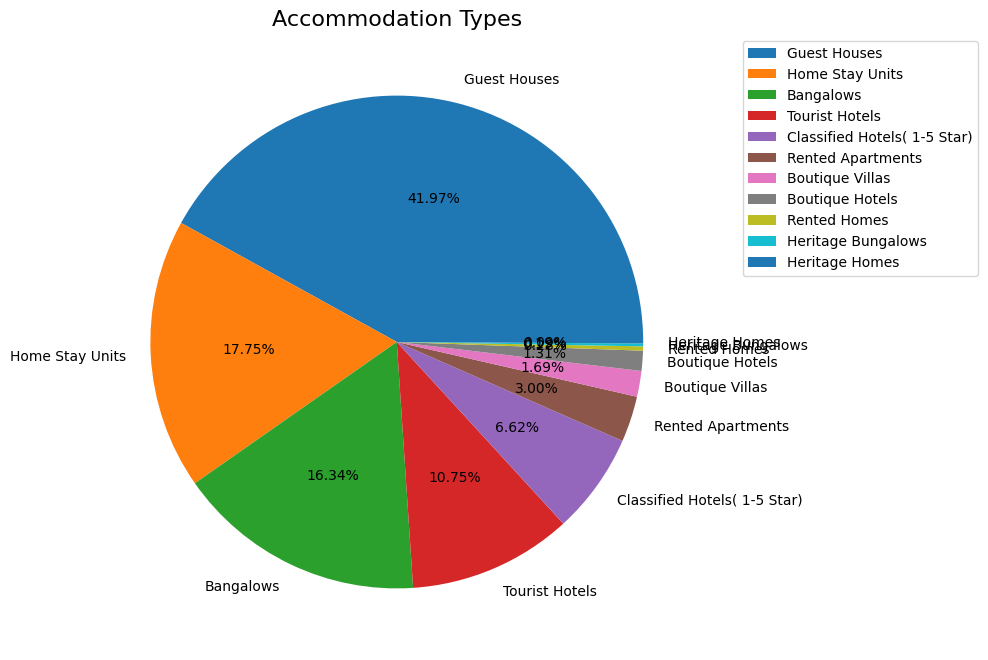

In [16]:
grouped_data = df.groupby('Type')['Type'].count()
print(grouped_data)

total_records = df.shape[0]
percentage_data = (grouped_data / total_records) * 100
#pie chart

labels = df['Type'].value_counts().index.to_list()
plt.figure(figsize=(15, 8))
plt.pie(df['Type'].value_counts(), labels=labels, autopct='%.2f%%')
plt.title('Accommodation Types', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


There are 11 types of accommodation placesin Sri Lanka in 2018 and there are 2130 rooms available for accommodations for tourists. Most popular accommodation places are low- luxury accommodation types. Guest houses, which is categorized as low luxury accommodation type are the most common type of accommodation for tourists in Sri Lanka & among them most guest houses in Sri Lanka hold Grade A classification, ensuring high standards of quality.

District
Ampara           62
Anuradhapura     58
Badulla         116
Batticaloa       44
Colombo         297
Galle           284
Gampaha         207
Hambantota       76
Jaffna           29
Kalutara        132
Kandy           266
Kegalle          39
Kilinochchi       6
Kurunegala       48
Mannar            4
Matale           86
Matara           88
Moneragala       30
Mullaitivu        4
Nuwara Eliya     93
Polonnaruwa      35
Puttalam         54
Ratnapura        37
Trincomalee      28
Vavuniya          7
Name: District, dtype: int64


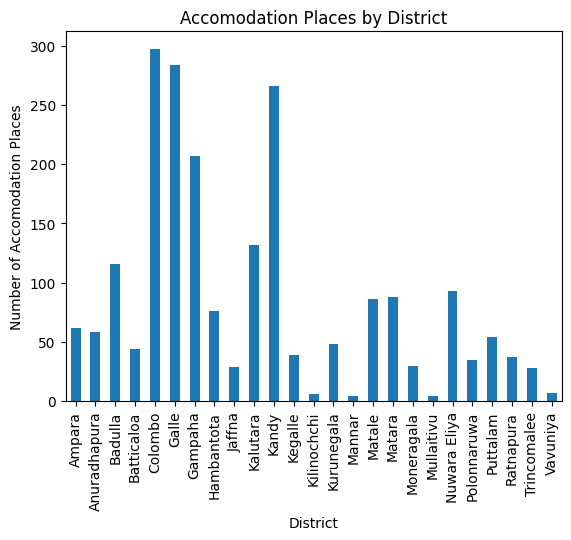

In [18]:
grouped_data = df.groupby('District')['District'].count()
print(grouped_data)

total_records = df.shape[0]
percentage_data = (grouped_data / total_records) * 100

#bar chart
grouped_data.plot(kind='bar')
plt.xlabel("District")
plt.ylabel("Number of Accomodation Places")
plt.title("Accomodation Places by District")
plt.show()

In [19]:
grouped_data = df.groupby('Name')['Name'].count()
print(grouped_data)
#This variable contains unique values

Name
135 VILLA               1
15 L M D                1
1ST CHOICE              1
218 HOLIDAY RESORT      1
25 RAMPART STREET       1
                       ..
ZENITH                  1
ZIM BAY                 1
ZMAX FAIRWAY COLOMBO    1
ZODA BOLGODA            1
ZYLAN LUXURY VILLA.     1
Name: Name, Length: 2120, dtype: int64


In [20]:
grouped_data = df.groupby('Address')['Address'].count()
print(grouped_data)
#Thia variable also contains unique values

Address
"BLUE LAGOON'WELLAWATTE,HIKKADUWA                              1
"COMILLA WATHE" 76/5, INDURUGALLA, WATHURUGAMA                 1
"DARHANA" KITHAL-ELLA,ELLA                                     1
"DISNA"KITHAL-ELLA,ELLA                                        1
"FIELD VIEW", BADDEGAMA ROAD, NALAGASDENIYA, HIKKADUWA         1
                                                              ..
YATANTALE, UDAMULLA                                            1
YATHRAMULLA,BENTOTA                                            1
YATIBERIYA, PITAWALA, NAWALAPITIYA                             1
ZAVIER ROAD, WENNAPPUWA                                        1
ZONE 7, LOT 21 - K, MILLENNIUM CITY, ORUWALA, ATHURUGIRIYA.    1
Name: Address, Length: 2095, dtype: int64


In [21]:
grouped_data = df.groupby('AGA Division')['AGA Division'].count()
print(grouped_data)

AGA Division
AKKARAIPATTU                     2
Akmeemana                        5
Akurana Pradeshiya Sabha         1
Akuressa Pradeshiya Sabha        2
Alawwa Pradeshiya Sabha          2
                                ..
Wilgamuwa Pradeshiya Sabha       1
Yatinuwara Pradeshiya Sabha      3
Yatiyantota Pradeshiya Sabha     4
balapitiya                      11
mirigama                         1
Name: AGA Division, Length: 183, dtype: int64


In [22]:
grouped_data = df.groupby('PS/MC/UC')['PS/MC/UC'].count()
print(grouped_data)

PS/MC/UC
Ahelapola                               1
Akkaraipattu Divisional Secretariat     2
Akmeemana Divisional Secretariat        5
Akurana Divisional Secretariat          1
Akuressa Divisional Secretariat         3
                                       ..
Yakkalamulla Divisional Secretariat     2
Yatinuwara Divisional Secretariat       9
Yatiyanthota Divisional Secretariat     2
balapitiya                              1
kaduwela Divisional Secretariat        15
Name: PS/MC/UC, Length: 232, dtype: int64


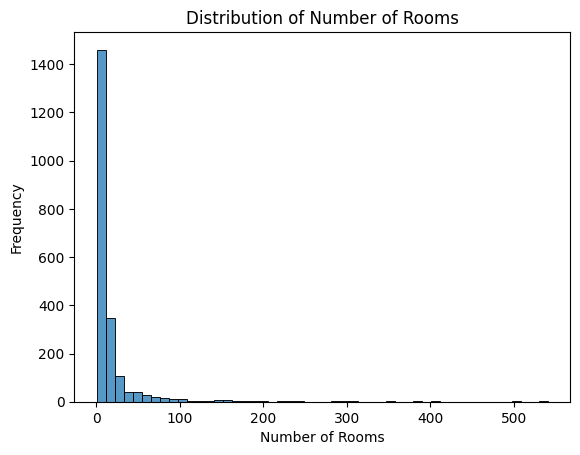

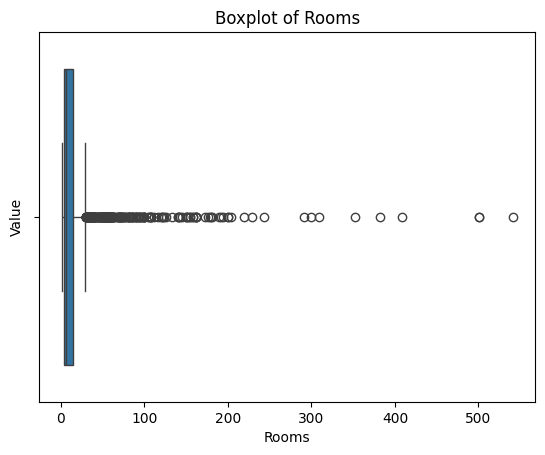

In [23]:
sns.histplot(df['Rooms'], bins=50)
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Rooms')
plt.show()

sns.boxplot(x=df['Rooms'])
plt.xlabel('Rooms')
plt.ylabel('Value')
plt.title('Boxplot of Rooms')
plt.show()

There can be high no of rooms avaible in some Accommodations


In [24]:
highest_rooms = df['Rooms'].max()
highest_rooms_name = df[df['Rooms'] == highest_rooms]['Name'].values[0]

print(f"Name of the accommodation with the highest number of rooms: {highest_rooms_name}")


Name of the accommodation with the highest number of rooms: SHANGRI- LA HOTEL COLOMBO


In [29]:
filtered_df = df[df['Rooms'] > 400]
accommodation_types = filtered_df['Type'].unique()

for accommodation_type in accommodation_types:
    print("Accommodation Types which has the high number of rooms:", accommodation_type)


Accommodation Types which has the high number of rooms: Classified Hotels( 1-5 Star)


**Bivariate** **analysis**

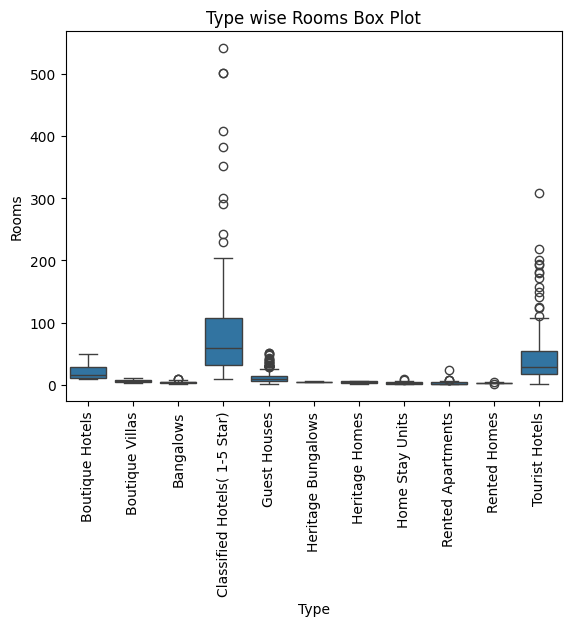

In [30]:
sns.boxplot(x = 'Type', y = 'Rooms', data = df)
plt.xlabel('Type')
plt.ylabel('Rooms')
plt.title('Type wise Rooms Box Plot')
plt.xticks(rotation = 90)
plt.show()


High no of rooms offered by Classification hotels (1-5 star) and tourist hotels

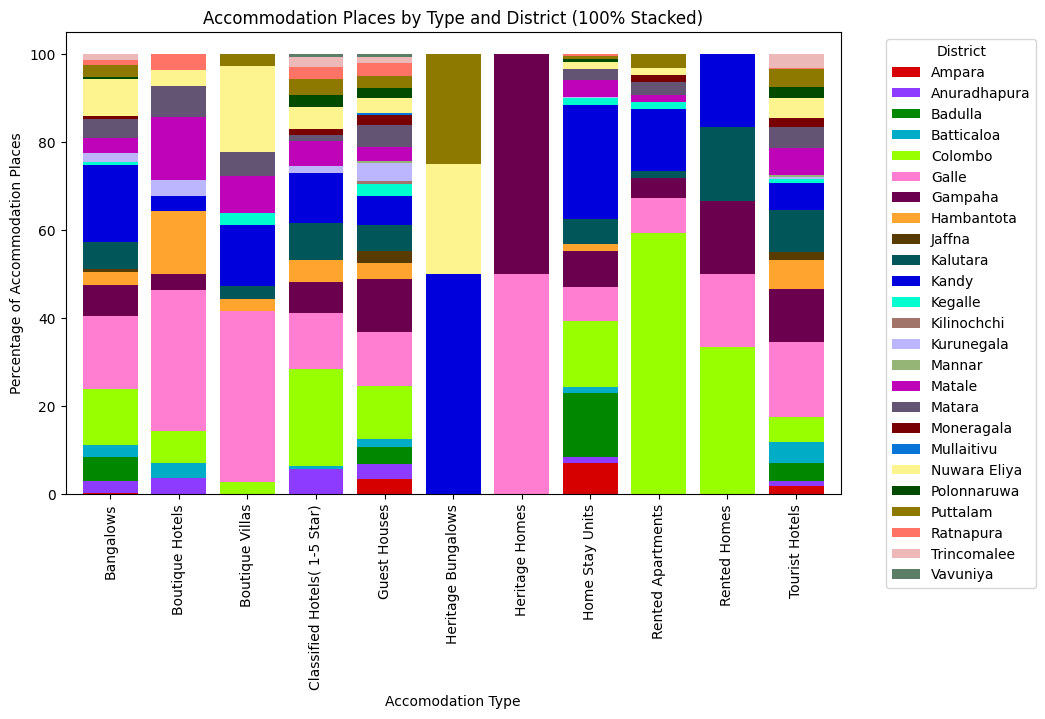

In [33]:
import colorcet as cc
# Group the data by Type and District
grouped_data = df.groupby(['Type', 'District']).size().unstack()

# Calculate percentages
grouped_data_pct = grouped_data.apply(lambda x: 100 * x / x.sum(), axis=1)

# Create a 100% stacked clustered bar chart
fig, ax = plt.subplots(figsize=(10, 6))
colors = sns.color_palette(cc.glasbey, n_colors=25)
grouped_data_pct.plot(kind='bar', stacked=True, ax=ax, width=0.8, color=colors)

# Add labels and title
ax.set_xlabel('Accomodation Type')
ax.set_ylabel('Percentage of Accommodation Places')
ax.set_title('Accommodation Places by Type and District (100% Stacked)')

# Add legend
ax.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()



In [35]:
df_bungalow = df[df['Type'] == 'Bangalows']
#df_boutique_hotels = df[df['Type'] == 'Boutique Hotels'] --since Grade is missing
#df_boutique_villas = df[df['Type'] == 'Boutique Villas'] --since Grade is missing
df_star_hotel = df[df['Type'] == 'Classified Hotels( 1-5 Star)']
df_guest_house = df[df['Type'] == 'Guest Houses']
#df_heritage_bungalow = df[df['Type'] == 'Heritage Bungalows'] --since Grade is missing
df_heritage_homes = df[df['Type'] == 'Heritage Homes']
df_home_stay = df[df['Type'] == 'Home Stay Units']
df_apartments = df[df['Type'] == 'Rented Apartments']
df_rented_homes = df[df['Type'] == 'Rented Homes']
df_hotels = df[df['Type'] == 'Tourist Hotels']

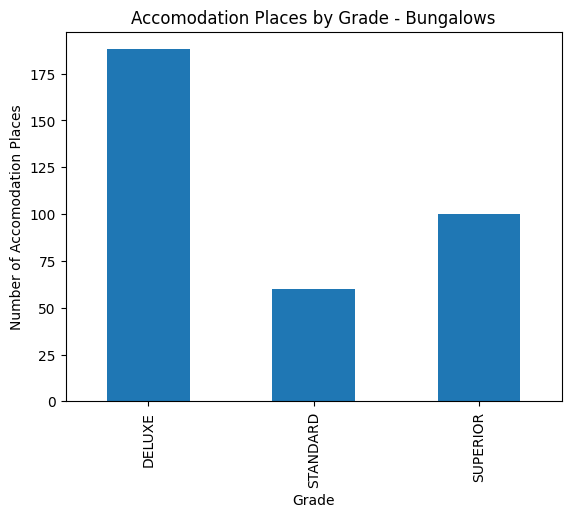

In [36]:
grouped_data = df_bungalow.groupby('Grade')['Grade'].count()
total_records = df_bungalow.shape[0]
percentage_data = (grouped_data / total_records) * 100

#bar chart
grouped_data.plot(kind='bar')
plt.xlabel("Grade")
plt.ylabel("Number of Accomodation Places")
plt.title("Accomodation Places by Grade - Bungalows")
plt.show()

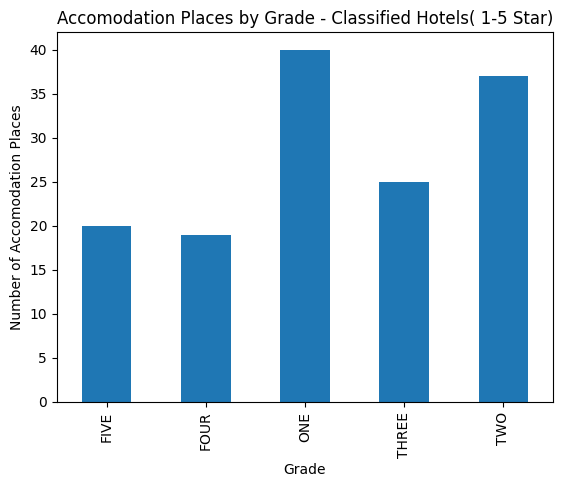

In [37]:
grouped_data = df_star_hotel.groupby('Grade')['Grade'].count()
total_records = df_star_hotel.shape[0]
percentage_data = (grouped_data / total_records) * 100

#bar chart
grouped_data.plot(kind='bar')
plt.xlabel("Grade")
plt.ylabel("Number of Accomodation Places")
plt.title("Accomodation Places by Grade - Classified Hotels( 1-5 Star)")
plt.show()



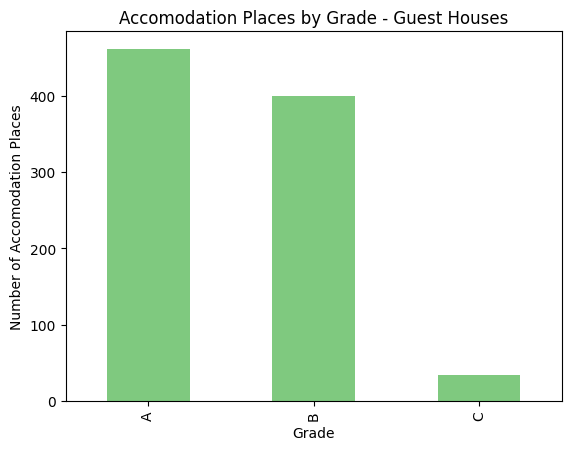

In [38]:
grouped_data = df_guest_house.groupby('Grade')['Grade'].count()
total_records = df_guest_house.shape[0]
percentage_data = (grouped_data / total_records) * 100

#bar chart
grouped_data.plot(kind='bar',colormap='Accent')
plt.xlabel("Grade")
plt.ylabel("Number of Accomodation Places")
plt.title("Accomodation Places by Grade - Guest Houses")
plt.show()

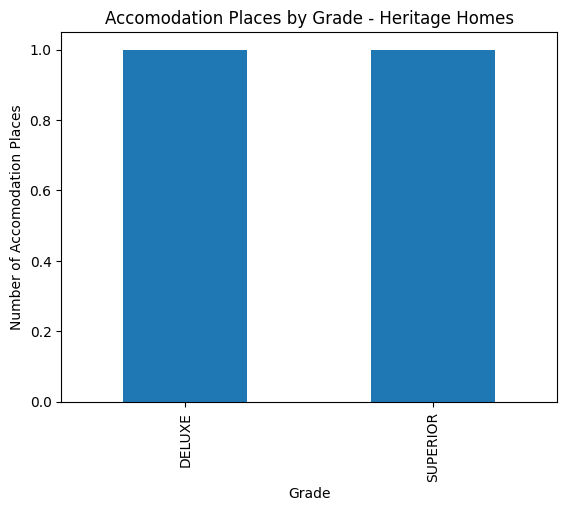

In [39]:
grouped_data = df_heritage_homes.groupby('Grade')['Grade'].count()
total_records = df_heritage_homes.shape[0]
percentage_data = (grouped_data / total_records) * 100

#bar chart
grouped_data.plot(kind='bar')
plt.xlabel("Grade")
plt.ylabel("Number of Accomodation Places")
plt.title("Accomodation Places by Grade - Heritage Homes")
plt.show()

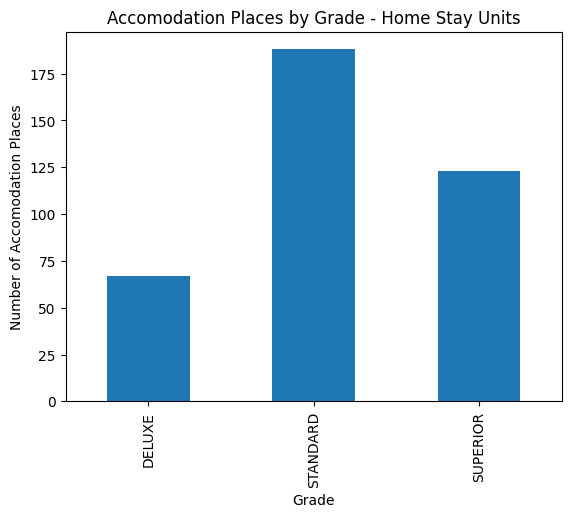

In [40]:
grouped_data = df_home_stay.groupby('Grade')['Grade'].count()
total_records = df_home_stay.shape[0]
percentage_data = (grouped_data / total_records) * 100

#bar chart
grouped_data.plot(kind='bar')
plt.xlabel("Grade")
plt.ylabel("Number of Accomodation Places")
plt.title("Accomodation Places by Grade - Home Stay Units")
plt.show()

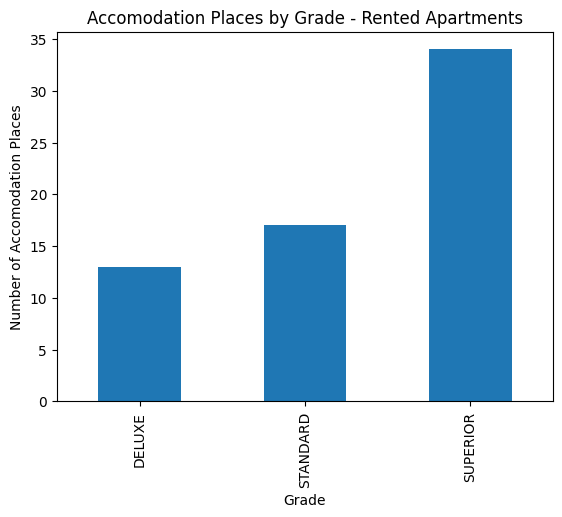

In [41]:
grouped_data = df_apartments.groupby('Grade')['Grade'].count()
total_records = df_apartments.shape[0]
percentage_data = (grouped_data / total_records) * 100

#bar chart
grouped_data.plot(kind='bar')
plt.xlabel("Grade")
plt.ylabel("Number of Accomodation Places")
plt.title("Accomodation Places by Grade - Rented Apartments")
plt.show()

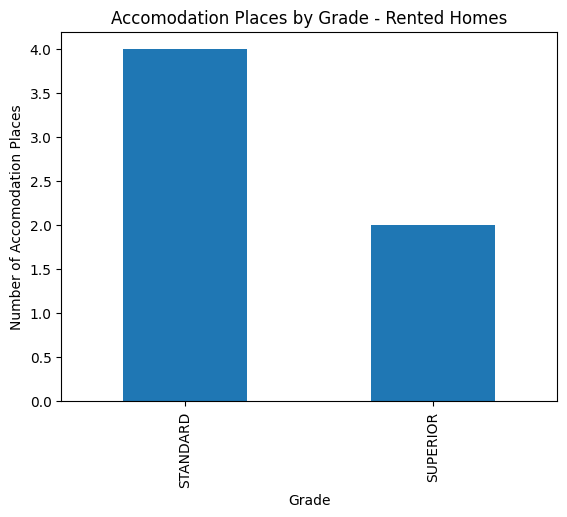

In [42]:
grouped_data = df_rented_homes.groupby('Grade')['Grade'].count()
total_records = df_rented_homes.shape[0]
percentage_data = (grouped_data / total_records) * 100

#bar chart
grouped_data.plot(kind='bar')
plt.xlabel("Grade")
plt.ylabel("Number of Accomodation Places")
plt.title("Accomodation Places by Grade - Rented Homes")
plt.show()

Further Graphs are plotted using Power BI